In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading CSV file
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
print('Before cleaning the data: {}'.format(df.shape))

Before cleaning the data: (76014, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

## Data Cleaning

In [6]:
# Removing the unwanted columns
df.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
# Considering only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [8]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# Checking the duplicate row
df.duplicated().sum()

0

In [10]:
# Checking the null value
df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

<AxesSubplot:>

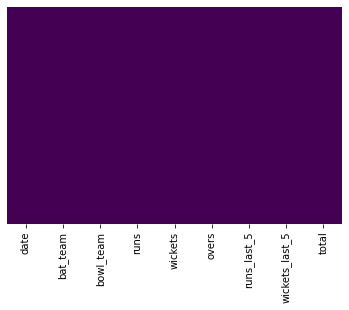

In [11]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [12]:
print('After cleaning the data: {}'.format(df.shape))

After cleaning the data: (40108, 9)


In [13]:
# Average score of each team in IPL
pd.DataFrame(df.groupby(['bat_team'])['total'].mean())

,total
bat_team,
Chennai Super Kings,167.495211
Delhi Daredevils,153.774978
Kings XI Punjab,163.054403
Kolkata Knight Riders,157.870247
Mumbai Indians,163.950159
Rajasthan Royals,159.511860
Royal Challengers Bangalore,162.759357
Sunrisers Hyderabad,165.360396


<AxesSubplot:>

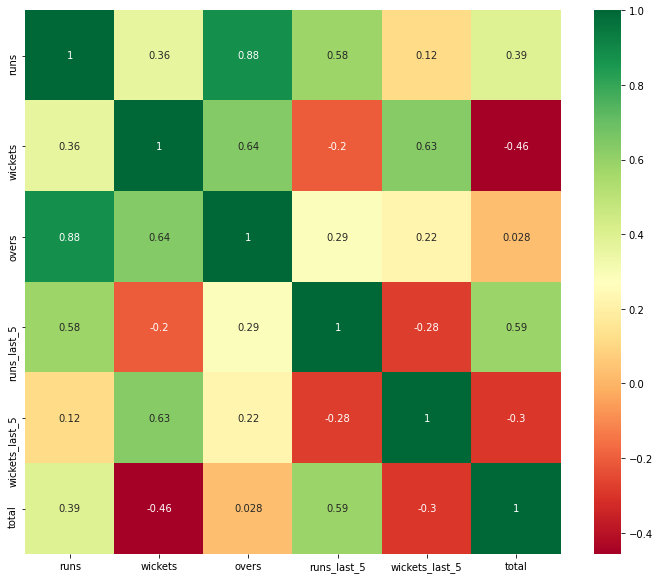

In [14]:
# Correlation of each of the feature
corrmat = df.corr()
plt.figure(figsize=(12,10))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

## Data Preprocessing

In [15]:
# Converting categorical features using OneHotEncoding method
Dummies = pd.get_dummies(df[['bat_team', 'bowl_team']])
df = df.drop(['bat_team', 'bowl_team'], axis = 1)
df = pd.concat([df, Dummies], axis = 1)

In [16]:
df.shape

(40108, 23)

In [17]:
# Splitting the data into train and test set
train_data = df[df['date'].dt.year <= 2016]
test_data = df[df['date'].dt.year >=2017]

X_train = train_data.drop(['total', 'date'], axis=1)
X_test = test_data.drop(['total', 'date'], axis=1)

y_train = train_data['total']
y_test = test_data['total']

In [18]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

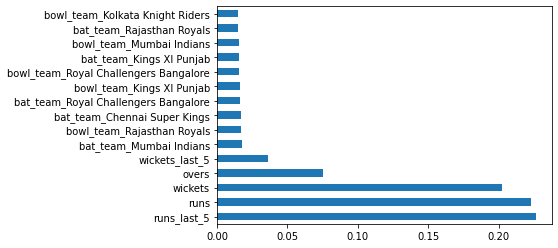

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Model Building
### Linear Regression

In [20]:
## Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = regressor.predict(X_train)

In [22]:
from sklearn import metrics
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train RMSE: 17.530606671826085


In [23]:
predict=regressor.predict(X_test)

<AxesSubplot:xlabel='total', ylabel='Density'>

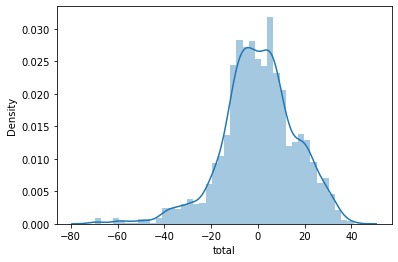

In [24]:
import seaborn as sns
sns.distplot(y_test-predict)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 12.118617546193244
MSE: 251.00792310417265
RMSE: 15.84322956673205


### Random Forest Regression

In [26]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
predict1 = random_regressor.predict(X_test)

<AxesSubplot:xlabel='total', ylabel='Density'>

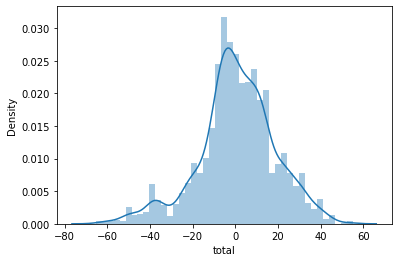

In [28]:
sns.distplot(y_test-predict1)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predict1))
print('MSE:', metrics.mean_squared_error(y_test, predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict1)))

MAE: 13.715885606294352
MSE: 328.80672151876644
RMSE: 18.13302847068758


### Ridge Regression

In [30]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [31]:
ridge=Ridge()
parameters={'alpha':[1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40, 50, 60,70,80,90,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-325.88204212234365


In [33]:
pred2 = ridge_regressor.predict(X_train)
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred2)))

Train RMSE: 17.530717396459703


In [34]:
predict2=ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='total', ylabel='Density'>

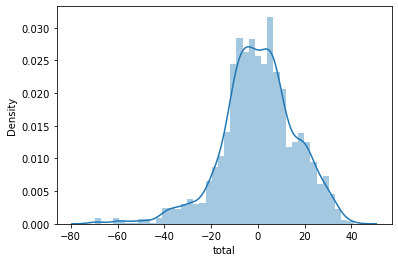

In [35]:
sns.distplot(y_test-predict2)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predict2))
print('MSE:', metrics.mean_squared_error(y_test, predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict2)))

MAE: 12.115466773869304
MSE: 251.06901128024973
RMSE: 15.845157344761514


### Lasso Regression

In [37]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [38]:
lasso=Lasso()
parameters={'alpha':[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,50]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 50]},
             scoring='neg_mean_squared_error')

In [39]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.90408001754236


In [40]:
pred3 = lasso_regressor.predict(X_train)
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred3)))

Train RMSE: 17.82043000339073


In [41]:
predict3=lasso_regressor.predict(X_test)

<AxesSubplot:xlabel='total', ylabel='Density'>

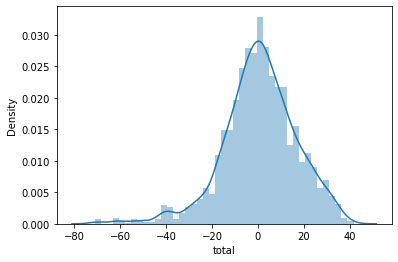

In [42]:
sns.distplot(y_test-predict3)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predict3))
print('MSE:', metrics.mean_squared_error(y_test, predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict3)))

MAE: 12.213583996827493
MSE: 262.3653827960697
RMSE: 16.197696836157593


#### Note: Since Linear Regression model performed better as compared to other three, we use this model for future prediction.

## Predictions

#### Model predicts on the data of 2018 and 2019

In [4]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])
 
  
  # Prediction
  return int(regressor.predict(temp_array)[0])

## Prediction 1

• Date: 18th April 2018<br>
• Teams: Kolkata Knight Riders vs. Rajasthan Royals<br>
• First Innings final score: 160/8

In [51]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Kolkata Knight Riders', overs=13.1, runs=100, wickets=3, runs_in_prev_5=42, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 164 to 179


## Prediction 2

• Date: 10th May 2019(Eliminator)<br>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br>
• First Innings final score: 147/9

In [52]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 147 to 162


## Prediction 3
• Date: 11th April 2019<br>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br>
• First Innings final score: 151/7

In [53]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 146 to 161


In [54]:
import pickle
# open a file, where you ant to store the data
file = open('ipl_score_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

In [55]:
# Creating a pickle file for the classifier
filename = 'ipl_score_prediction1.pkl'
pickle.dump(regressor, open(filename, 'wb'))